In [1]:
import time
import json
import numpy as np
from utils.LP_functions import comparison_epsilon, evaluation_epsilon, LP_obj_optimal
from utils.plotting import plot_epsilonComparison, plot_CI_epsilonComparison, plot_optGap_epsilonComparison

In [ ]:
w = {(1, 2): None,
    (1, 3): None,
    (1, 4): None,
    (1, 5): 2.02,
    (1, 6): 2.02,
    (1, 7): 2.02,
    (1, 8): 2.02,
    (2, 3): None,
    (2, 4): None,
    (2, 5): 2.02,
    (2, 6): 2.02,
    (2, 7): 2.02,
    (2, 8): 2.02,
    (3, 4): None,
    (3, 5): 2.02,
    (3, 6): 2.02,
    (3, 7): 2.02,
    (3, 8): 2.02,
    (4, 5): 2.02,
    (4, 6): 2.02,
    (4, 7): 2.02,
    (4, 8): 2.02,
    (5, 6): 2.02,
    (5, 7): 2.02,
    (5, 8): 2.02,
    (6, 7): 2.02,
    (6, 8): 2.02,
    (7, 8): 2.02}

In [31]:
w = {
    "(1, 2)": 3.0158429352664142,
    "(1, 3)": 3.043542817205786,
    "(1, 4)": 3.1669131932612897,
    "(1, 5)": 3.1467314427566855,
    "(1, 6)": 2.8936031297484033,
    "(1, 7)": 2.980858571209466,
    "(1, 8)": 3.1335646965676265,
    "(2, 3)": 3.0811886012220056,
    "(2, 4)": 3.043365053835512,
    "(2, 5)": 3.0638886123297677,
    "(2, 6)": 2.9347224075004426,
    "(2, 7)": 2.8717666772208967,
    "(2, 8)": 3.136450729603944,
    "(3, 4)": 2.8036979676766958,
    "(3, 5)": 3.019670801007701,
    "(3, 6)": 3.162854829949071,
    "(3, 7)": 2.8068588369297944,
    "(3, 8)": 2.825448429081741,
    "(4, 5)": 2.8621336956410626,
    "(4, 6)": 2.91777289015584,
    "(4, 7)": 2.8312545316964037,
    "(4, 8)": 3.130486589937699,
    "(5, 6)": 3.188920715768945,
    "(5, 7)": 2.8862035614453423,
    "(5, 8)": 3.101681642818335,
    "(6, 7)": 2.9378267306862464,
    "(6, 8)": 3.1919858495770885,
    "(7, 8)": 2.848287365067278
  }

w = {eval(k):v for k,v in w.items()}
w

{(1, 2): 3.0158429352664142,
 (1, 3): 3.043542817205786,
 (1, 4): 3.1669131932612897,
 (1, 5): 3.1467314427566855,
 (1, 6): 2.8936031297484033,
 (1, 7): 2.980858571209466,
 (1, 8): 3.1335646965676265,
 (2, 3): 3.0811886012220056,
 (2, 4): 3.043365053835512,
 (2, 5): 3.0638886123297677,
 (2, 6): 2.9347224075004426,
 (2, 7): 2.8717666772208967,
 (2, 8): 3.136450729603944,
 (3, 4): 2.8036979676766958,
 (3, 5): 3.019670801007701,
 (3, 6): 3.162854829949071,
 (3, 7): 2.8068588369297944,
 (3, 8): 2.825448429081741,
 (4, 5): 2.8621336956410626,
 (4, 6): 2.91777289015584,
 (4, 7): 2.8312545316964037,
 (4, 8): 3.130486589937699,
 (5, 6): 3.188920715768945,
 (5, 7): 2.8862035614453423,
 (5, 8): 3.101681642818335,
 (6, 7): 2.9378267306862464,
 (6, 8): 3.1919858495770885,
 (7, 8): 2.848287365067278}

: 

In [23]:
import numpy as np
for key in w.keys():
    w[key] = np.random.uniform(1.9, 2.1)
w

{(1, 2): 2.093667789973577,
 (1, 3): 2.0397679467629555,
 (1, 4): 1.9623921908985666,
 (1, 5): 1.985881773116472,
 (1, 6): 2.0146552711627255,
 (1, 7): 2.052269735810645,
 (1, 8): 1.9512246691506894,
 (2, 3): 1.9946342543842692,
 (2, 4): 1.902223187194079,
 (2, 5): 2.030302650367223,
 (2, 6): 2.027109460425652,
 (2, 7): 2.041204077930563,
 (2, 8): 2.0949420264651897,
 (3, 4): 1.9229480405442636,
 (3, 5): 1.9659767694352177,
 (3, 6): 2.001319833583405,
 (3, 7): 1.9414943589648475,
 (3, 8): 2.0760931415435633,
 (4, 5): 2.014052335560319,
 (4, 6): 1.9963225944759295,
 (4, 7): 2.0495209285888514,
 (4, 8): 1.9157493055577421,
 (5, 6): 2.0478500482464246,
 (5, 7): 1.92069555926702,
 (5, 8): 1.9978157241409709,
 (6, 7): 1.9779129653049157,
 (6, 8): 1.9820794352442952,
 (7, 8): 1.9531038713889752}

In [12]:
with open("obj_lists_epsilon.json", "r") as f:
    obj_lists = json.load(f)
print(obj_lists.keys())
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]
sample_number = np.array([2**i for i in range(6, 13)])
B = 200
k = 10
B12 = (20,200)
# epsilon_list = [0, 2**-6, 2**-4, 2**-2, 1, "dynamic"]
epsilon_list = ['X', 'X', 'X', 'X', 'X', "dynamic"]

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


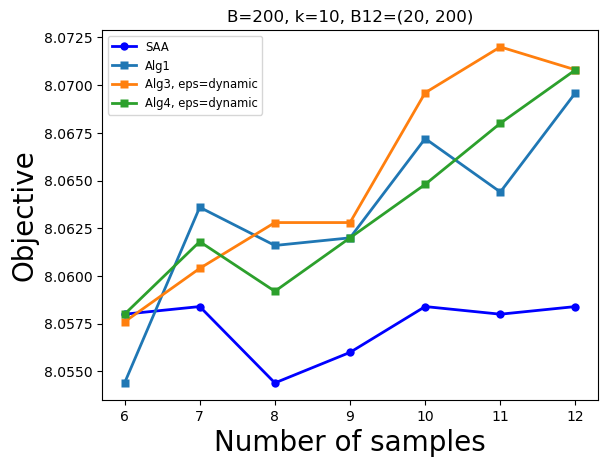

In [13]:
plot_epsilonComparison(SAA_obj_avg, bagging_alg1_obj_avg, bagging_alg3_obj_avg, bagging_alg4_obj_avg, np.log2(sample_number), B, k, B12, epsilon_list)

In [2]:
w = {(1, 2): None,
    (1, 3): None,
    (1, 4): None,
    (1, 5): 2.02,
    (1, 6): 2.02,
    (1, 7): 2.02,
    (1, 8): 2.02,
    (2, 3): None,
    (2, 4): None,
    (2, 5): 2.02,
    (2, 6): 2.02,
    (2, 7): 2.02,
    (2, 8): 2.02,
    (3, 4): None,
    (3, 5): 2.02,
    (3, 6): 2.02,
    (3, 7): 2.02,
    (3, 8): 2.02,
    (4, 5): 2.02,
    (4, 6): 2.02,
    (4, 7): 2.02,
    (4, 8): 2.02,
    (5, 6): 2.02,
    (5, 7): 2.02,
    (5, 8): 2.02,
    (6, 7): 2.02,
    (6, 8): 2.02,
    (7, 8): 2.02}

A = np.array([[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1]])

sample_args = {
        "type" : "pareto",
        "params": [2,2,2,2,2,2]}

from utils.LP_functions import LP_obj_optimal
N = 8

for i in range(10):
    obj, x_opt = LP_obj_optimal(sample_args, N, w, A, seed = i)
    print(obj, x_opt)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
8.08 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0.

In [1]:
import numpy as np
from utils.LP_functions_full_random import check_SAA_optimal, simulate_SAA_pk, get_pareto_params

# check if appropriate sizes of resample are enough

N = 8
w = {(1, 2): 10,
(1, 3): 10,
(1, 4): 10,
(1, 5): 11,
(1, 6): 11,
(1, 7): 11,
(1, 8): 11,
(2, 3): 10,
(2, 4): 10,
(2, 5): 11,
(2, 6): 11,
(2, 7): 11,
(2, 8): 11,
(3, 4): 10,
(3, 5): 11,
(3, 6): 11,
(3, 7): 11,
(3, 8): 11,
(4, 5): 11,
(4, 6): 11,
(4, 7): 11,
(4, 8): 11,
(5, 6): 11,
(5, 7): 11,
(5, 8): 11,
(6, 7): 11,
(6, 8): 11,
(7, 8): 11}

params = get_pareto_params(N,w)

sample_args = {
    "type" : "pareto",
    "params": params
}

A = np.array([[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1]])

seed = 2024
rng_sample = np.random.default_rng(seed=seed)

number_of_iterations = 500
n = 50
result = []

for n in [10, 50, 100, 200, 500]:
    pk_dict, retrieved_set = simulate_SAA_pk(n, number_of_iterations, rng_sample, sample_args, N, w, A)
    prob_opt = check_SAA_optimal(pk_dict, retrieved_set, N, w ,A)
    result.append(prob_opt)

print(result)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13

In [36]:
import numpy as np
from utils.LP_functions_full_random import check_SAA_optimal, simulate_SAA_pk, get_pareto_params

# check if appropriate sizes of resample are enough

N = 8
w = {(1, 2): 2.8,
(1, 3): 2.8,
(1, 4): 2.8,
(1, 5): 3.3,
(1, 6): 3.3,
(1, 7): 3.3,
(1, 8): 3.3,
(2, 3): 2.8,
(2, 4): 2.8,
(2, 5): 3.3,
(2, 6): 3.3,
(2, 7): 3.3,
(2, 8): 3.3,
(3, 4): 2.8,
(3, 5): 3.3,
(3, 6): 3.3,
(3, 7): 3.3,
(3, 8): 3.3,
(4, 5): 3.3,
(4, 6): 3.3,
(4, 7): 3.3,
(4, 8): 3.3,
(5, 6): 3.3,
(5, 7): 3.3,
(5, 8): 3.3,
(6, 7): 3.3,
(6, 8): 3.3,
(7, 8): 3.3}


params = get_pareto_params(N,w)

sample_args = {
    "type" : "pareto",
    "params": params
}

A = np.array([[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1]])

seed = 2024
rng_sample = np.random.default_rng(seed=seed)

number_of_iterations = 500
# n = 10
result = []

for n in [10, 50, 100]:
    pk_dict, retrieved_set = simulate_SAA_pk(n, number_of_iterations, rng_sample, sample_args, N, w, A)
    prob_opt = check_SAA_optimal(pk_dict, retrieved_set, N, w ,A)
    result.append(prob_opt)

print(result)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13

In [38]:
from utils.generateSamples import genSample_SSKP
import numpy as np

rng = np.random.default_rng()
for _ in range(10):
    samples = genSample_SSKP(10000, rng, type ="pareto", params = [1.4,2.8])
    print(np.mean(samples))

2.5670036820580346
2.4764834196292513
2.343068680479926
2.4261979990103058
2.332220120880365
2.5578890626580737
2.6446566410405814
2.389413595336514
2.478348366635114
2.622595729479628


In [39]:
np.shape(samples)

(10000, 2)

In [40]:
samples

array([[1.35232622, 1.51163925],
       [1.44917082, 1.70719559],
       [1.21335527, 1.22475448],
       ...,
       [1.40901033, 1.08408965],
       [1.00083184, 1.24475322],
       [1.36548662, 1.14516828]])

In [5]:
import json
with open("remaining.json", "r") as f:
    remaining = json.load(f)
remaining.keys()

dict_keys(['retrieved_set', 'x_count_dict', 'obj_opt_dict', 'pk_dict_SAA', 'pk_dict_Alg34'])

In [9]:
retrieved_set = eval(remaining['retrieved_set'])

In [3]:
pk_dict_SAA = remaining["pk_dict_SAA"]
print(max(pk_dict_SAA.values()))

0.022000000000000006


In [4]:
pk_dict_Alg34 = remaining["pk_dict_Alg34"]
print(max(pk_dict_Alg34.values()))


0.2740000000000002


In [5]:
sample_args = {
    "params": [2.5,2,3], # list of pareto shapes
    "beta_true": [1,1,1], # underlying true beta vector
    "noise": 5 # noise shape
}
from utils.generateSamples import genSample_LASSO
import numpy as np
rng = np.random.default_rng()
samples = genSample_LASSO(1000000, rng, sample_args)

(1000000, 1) (1000000, 3)


In [6]:
np.shape(samples)

(1000000, 4)

In [7]:
np.mean(samples, axis=0)

array([5.16491147, 1.66546877, 1.99989903, 1.49911861])

In [3]:
import numpy as np
from LASSO import get_sample_loss
from utils.generateSamples import genSample_LASSO
meanX = [1.5,1.5,1.5]

sample_args = {
    "meanX": meanX, # mean values of the x_vector
    "params": [item/(item-1) for item in meanX], # list of pareto shapes
    "beta_true": np.array([1,1,1]), # underlying true beta vector
    "noise": 3 # noise shape
}

rng = np.random.default_rng()
samples = genSample_LASSO(10000, rng, sample_args)
beta = np.array([1,1,3])
get_sample_loss(samples, beta)

12.952453264122369

In [4]:
get_sample_loss(samples,[1,1,1])

1.7493049949424495

In [2]:
import json
import numpy as np
with open("obj_lists.json", "r") as f:
    obj_lists = json.load(f)
print(obj_lists.keys())
obj_opt = 12

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


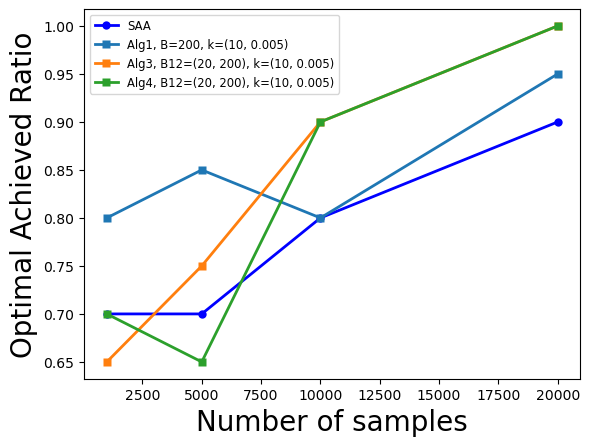

In [4]:
from utils.plotting import plot_optTime_twoPhase
sample_number = [
    1000,
    5000,
    10000,
    20000
  ]
B_list= [200]
k_list = [(10,0.005)]
B12_list = [(20,200)]
plot_optTime_twoPhase(obj_opt, obj_lists["SAA_obj_list"], obj_lists["bagging_alg1_obj_list"], obj_lists["bagging_alg3_obj_list"], obj_lists["bagging_alg4_obj_list"], sample_number, B_list, k_list, B12_list)

In [ ]:
import numpy as np

a = np.random.rand(10,2)
a_max

In [14]:
import json
with open("_LASSO_problems.json", "r") as f:
    problems = json.load(f)
problems.keys()

dict_keys(['meanX', 'beta_true', 'noise', 'lambda_list', 'beta_dict', 'expected_loss_dict'])

In [17]:
problems['beta_dict']['1']

'[-0.          0.          0.         ... -0.         -0.\n 21.96754004]'

In [28]:
import json
import numpy
with open("obj_lists.json", "r") as f:
    obj_lists = json.load(f)
print(obj_lists.keys())

with open("parameters.json", "r") as f:
    parameters = json.load(f)
obj_opt = parameters["obj_opt"]

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'dro_wasserstein_obj_list', 'dro_wasserstein_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


In [25]:
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
dro_wasserstein_obj_list = obj_lists["dro_wasserstein_obj_list"]
dro_wasserstein_obj_avg = obj_lists["dro_wasserstein_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

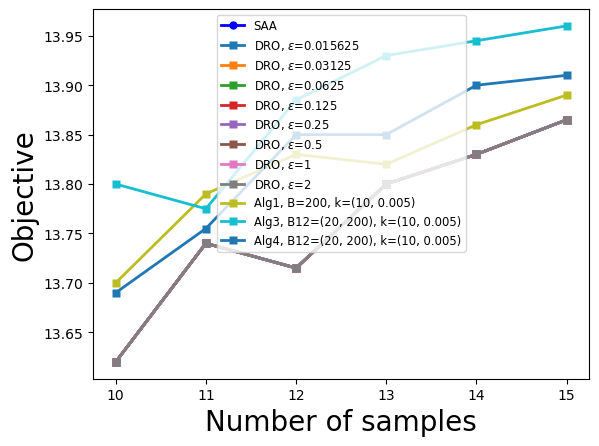

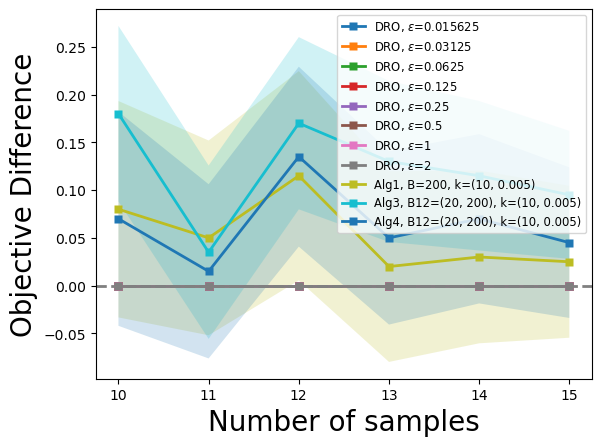

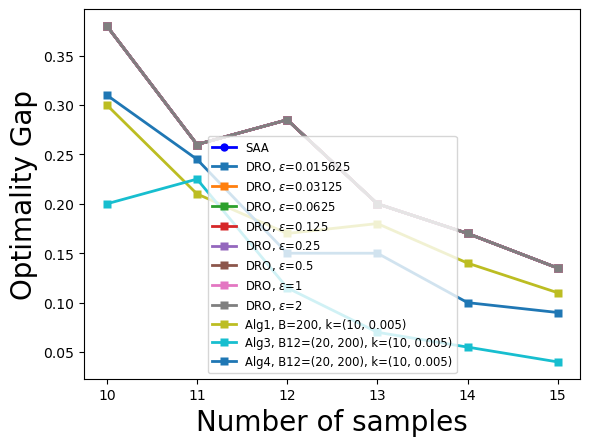

In [30]:
B_list = [200]
k_list = [(10, 0.005)]
B12_list = [(20,200)]
epsilon = "dynamic"
tolerance = 0.001
# varepsilon_list = [2**i for i in range(-6,4)]
varepsilon_list = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 'X', 'X']
number_of_iterations = 50
sample_number = np.array([2**i for i in range(10, 16)])

from utils.plotting import plot_droComparison, plot_CI_droComparison, plot_optGap_droComparison
plot_droComparison(SAA_obj_avg, dro_wasserstein_obj_avg, bagging_alg1_obj_avg, bagging_alg3_obj_avg, bagging_alg4_obj_avg, np.log2(sample_number), B_list, k_list, B12_list, varepsilon_list)
plot_CI_droComparison(SAA_obj_list, dro_wasserstein_obj_list, bagging_alg1_obj_list, bagging_alg3_obj_list, bagging_alg4_obj_list, np.log2(sample_number), B_list, k_list, B12_list, varepsilon_list)

plot_optGap_droComparison(obj_opt, "max", SAA_obj_avg, dro_wasserstein_obj_avg, bagging_alg1_obj_avg, bagging_alg3_obj_avg, bagging_alg4_obj_avg, np.log2(sample_number), B_list, k_list, B12_list, varepsilon_list)

In [27]:
[
    0.015625,
    0.03125,
    0.0625,
    0.125,
    0.25,
    0.5,
    1,
    2,
    4,
    8
  ]

[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]